In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


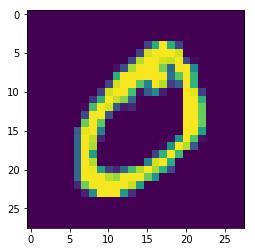

In [27]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [31]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [60]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #24
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) #22
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #11

model.add(BatchNormalization())
model.add(Convolution2D(16, 1, 1, activation='relu')) #11
model.add(BatchNormalization())

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))#9
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))#7
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(10, 1, 1, activation='relu')) #7
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu'))#5
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(10, 5))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:

In [61]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_41 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
dropout_42 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_50 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 22, 22, 32)       

In [65]:
import keras.backend as K

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

def custom_loss(y_true, y_pred):
  print(f'y_true: {y_true}, y_pred: {y_pred}')
  sqr_w = 0
  lamda = 0.01
  
  for layer in model.layers:
    sqr_w += np.sum(np.sum(np.sum(np.square(layer.get_weights()))))
    
  l2_regularization = (lamda*sqr_w)/2*512
#   loss = K.sparse_categorical_crossentropy(y_true, y_pred) + l2_regularization
  loss = K.categorical_crossentropy(y_true, y_pred) + l2_regularization
  return loss

model.compile(loss=custom_loss, optimizer=Adam(lr=0.003), metrics=['accuracy'])

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)
train_iterator = datagen.flow(X_train, y_train, batch_size=512, shuffle=False)

model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=20, callbacks=[LearningRateScheduler(scheduler, verbose=1)])

y_true: Tensor("activation_6_target_3:0", shape=(?, ?), dtype=float32), y_pred: Tensor("activation_6/Softmax:0", shape=(?, ?), dtype=float32)
y_true: Tensor("activation_6_target_3:0", shape=(?, ?), dtype=float32), y_pred: Tensor("activation_6/Softmax:0", shape=(?, ?), dtype=float32)
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
118/118 [==============================] - 21s 181ms/step - loss: 4313.2053 - acc: 0.0986 - custom_loss: 4313.2053
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
  1/118 [..............................] - ETA: 8s - loss: 4313.2358 - acc: 0.0859 - custom_loss: 4313.2358

KeyboardInterrupt: ignored

In [59]:
test_iterator = datagen.flow(X_test, y_test, batch_size=512, shuffle=False)

_, score = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)

print(score)

0.09769999994039535
